In [47]:
#Carga de Librerias
#pandas Visualizacion de datos
#numpy Analisis matematico y cientifico de datos {arrays}
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # Suprimir Warnings
##Librerias para el algoritmo
from kmodes.kmodes import KModes
##Libreria para la grafica
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
##Para el manejo de las fechas
from datetime import datetime
##Para el procesamiento de los datos
from sklearn import preprocessing

In [48]:
#Carga del dataset y Visualizacion de datos
df=pd.read_csv('C:/Users/PC/Desktop/Tesis/Practicum4_SistemasInteligentes_UTPL/DataSet/Dataset.csv',encoding='ISO-8859-1')
df.head()

,id,case_in_country,reporting date,location,country,gender,age,symptom_onset,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom
0,1,0,1/20/2020,Shenzhen Guangdong,China,male,66.0,1/3/20,1/11/20,12/29/2019,1/4/20,1,0,0,0,NaN
1,2,0,1/20/2020,Shanghai,China,female,56.0,1/15/2020,1/15/2020,NaN,1/12/20,0,1,0,0,NaN
2,3,0,1/21/2020,Zhejiang,China,male,46.0,1/4/20,1/17/2020,NaN,1/3/20,0,1,0,0,NaN
3,4,0,1/21/2020,Tianjin,China,female,60.0,NaN,1/19/2020,NaN,NaN,1,0,0,0,NaN
4,5,0,1/21/2020,Tianjin,China,male,58.0,NaN,1/14/2020,NaN,NaN,0,0,0,0,NaN


In [49]:
#Renombrar Columnas para mas facil tratamiento del dataset
df.rename(columns={'case_in_country':'caseInCountry','reporting date': 'reportingDate','symptom_onset':'symptomOnset', 'hosp_visit_date':'hospVisitDate','exposure_start':'exposureStart','exposure_end':'exposureEnd','visiting Wuhan': 'visitingWuhan','from Wuhan': 'fromWuhan'}, inplace=True)

In [50]:
# Validacion del dataframe
#df.shape ##Numero de registros y de columnas
#df.describe() ##De manera general podemos ver el numero de registros, media, varianza, etc., de las columnas
##df.info() ##Vemos los tipos de datos de las columnas
#Observaciones exposure start y expusure end pueden eliminarse?

In [51]:
#Eliminar del dataser los datos vacios de las columnas genero y edad.
df=df[(df["gender"].notnull())&(df["age"].notnull())]

In [ ]:
#

In [52]:
#Hacemos Datos Categoricos a la columna genero [gender] femenino =2, hombre = 1
df['gender'].replace(['female','male'],[2,1],inplace=True)

In [53]:
# Agrupar la columna edad para una mejor comprension de los datos
#Discretizacion poner en el documento.
#Mencionar toda la parte del procesamiento, mas detallado
df['ageAgru'] = pd.cut(df['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
labels=['0-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])

In [95]:
df.head ()

,index,caseInCountry,reportingDate,location,gender,symptomOnset,hospVisitDate,exposureStart,exposureEnd,visitingWuhan,...,cough,vomiting_nausea_fatigue,difficultBreathing_respiratoryDistress,headache_heavyHead,throat,chill_cold,otherSymptom,asymptomatic,country,ageAgru
0,0,0,1/20/2020,Shenzhen Guangdong,1,1/3/20,1/11/20,12/29/2019,1/4/20,1,...,0,0,0,0,0,0,0,1,3,5
1,1,0,1/20/2020,Shanghai,2,1/15/2020,1/15/2020,NaN,1/12/20,0,...,0,0,0,0,0,0,0,1,3,4
2,2,0,1/21/2020,Zhejiang,1,1/4/20,1/17/2020,NaN,1/3/20,0,...,0,0,0,0,0,0,0,1,3,3
3,3,0,1/21/2020,Tianjin,2,NaN,1/19/2020,NaN,NaN,1,...,0,0,0,0,0,0,0,1,3,4
4,4,0,1/21/2020,Tianjin,1,NaN,1/14/2020,NaN,NaN,0,...,0,0,0,0,0,0,0,1,3,4


In [54]:
#Eliminar Columna age por que ya se agrupo
df  = df.drop('age',axis = 1)

In [55]:
#Desglosar Symptom
#Columna 1
df["fever"]=((df["symptom"].str.contains('fever',na=False,regex=False))*1)

In [56]:
#Agregar columna 2
df["cough"]=((df["symptom"].str.contains('cough',na=False,regex=False))*1)

In [57]:
#Agregar columna 3
df["vomiting_nausea_fatigue"]=((df["symptom"].str.contains('vomiting|nausea|fatigue',na=False,regex=True))*1)

In [58]:
##Agregar columna 4
df["difficultBreathing_respiratoryDistress"]=(df["symptom"].str.contains('breath|distress',na=False,regex=True))*1

In [59]:
##Agregar columna 5
df["headache_heavyHead"]=((df["symptom"].str.contains('head',na=False,regex=False))*1)

In [60]:
##Agregar columna 6
df["throat"]=((df["symptom"].str.contains('throat',na=False,regex=False))*1)

In [61]:
##Agregar columna 7
df["chill_cold"]=((df["symptom"].str.contains('chill|cold',na=False, regex=True))*1)

In [62]:
##Agregar columna 8
df["otherSymptom"]=((df["symptom"].str.contains('joint|runny|diarrhea|abdominal|pneumonia|loss|malaise|sputum|muscle|breathlessness|dyspnea|loss|nasal|mild|sneeze|chest|thirst|flu|cramps|aching|body|aches|reflux|physical|tired|myalgias',na=False,regex=True))*1)

In [63]:
##Crear Columna Asintomatico
df["asymptomatic"]=((df["symptom"].str.contains('SinSintomas',na=True,regex=True))*1)

In [96]:
df.head()

,index,caseInCountry,reportingDate,location,gender,symptomOnset,hospVisitDate,exposureStart,exposureEnd,visitingWuhan,...,cough,vomiting_nausea_fatigue,difficultBreathing_respiratoryDistress,headache_heavyHead,throat,chill_cold,otherSymptom,asymptomatic,country,ageAgru
0,0,0,1/20/2020,Shenzhen Guangdong,1,1/3/20,1/11/20,12/29/2019,1/4/20,1,...,0,0,0,0,0,0,0,1,3,5
1,1,0,1/20/2020,Shanghai,2,1/15/2020,1/15/2020,NaN,1/12/20,0,...,0,0,0,0,0,0,0,1,3,4
2,2,0,1/21/2020,Zhejiang,1,1/4/20,1/17/2020,NaN,1/3/20,0,...,0,0,0,0,0,0,0,1,3,3
3,3,0,1/21/2020,Tianjin,2,NaN,1/19/2020,NaN,NaN,1,...,0,0,0,0,0,0,0,1,3,4
4,4,0,1/21/2020,Tianjin,1,NaN,1/14/2020,NaN,NaN,0,...,0,0,0,0,0,0,0,1,3,4


In [65]:
#Eliminacion 
df.drop(['symptom','id','death'], axis=1, inplace=True)

In [66]:
#*****Eliminacion****
#df.drop(['id','death'], axis=1, inplace=True)

In [67]:
#Seleccionar las columnas ['country'] y ['ageAgru'] para trabajarlas en un nuevo dataframe
dfTemporal = df[['country','ageAgru']]

In [68]:
# Eliminar las columnas Copiadas en el dataframe
df.drop(['country','ageAgru'], axis=1, inplace=True)

In [69]:
#Hacer datos Categoricos las columnas 'country' y 'ageAgru' en el dataframe dfCategorical
le = preprocessing.LabelEncoder()
dfTemporal = dfTemporal.apply(le.fit_transform)

In [98]:
dfTemporal.head()

,country,ageAgru
0,3,5
1,3,4
2,3,3
3,3,4
4,3,4


In [99]:
##Unir el dataframe temporal con el dataframe original
df = pd.concat([df, dfTemporal], axis=1)
df.head()

,index,caseInCountry,reportingDate,location,gender,symptomOnset,hospVisitDate,exposureStart,exposureEnd,visitingWuhan,...,throat,chill_cold,otherSymptom,asymptomatic,country,ageAgru,country,ageAgru,country,ageAgru
0,0.0,0.0,1/20/2020,Shenzhen Guangdong,1.0,1/3/20,1/11/20,12/29/2019,1/4/20,1.0,...,0.0,0.0,0.0,1.0,3.0,5.0,3.0,5.0,3.0,5.0
1,1.0,0.0,1/20/2020,Shanghai,2.0,1/15/2020,1/15/2020,NaN,1/12/20,0.0,...,0.0,0.0,0.0,1.0,3.0,4.0,3.0,4.0,3.0,4.0
2,2.0,0.0,1/21/2020,Zhejiang,1.0,1/4/20,1/17/2020,NaN,1/3/20,0.0,...,0.0,0.0,0.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0
3,3.0,0.0,1/21/2020,Tianjin,2.0,NaN,1/19/2020,NaN,NaN,1.0,...,0.0,0.0,0.0,1.0,3.0,4.0,3.0,4.0,3.0,4.0
4,4.0,0.0,1/21/2020,Tianjin,1.0,NaN,1/14/2020,NaN,NaN,0.0,...,0.0,0.0,0.0,1.0,3.0,4.0,3.0,4.0,3.0,4.0


In [76]:
##Sacar una copia del dataframe
dfCopy = df.copy()

In [78]:
##Seleccionamos del dataframe unicamente las columnas categoricas para aplicar el algoritmo Kmeans
df = df[['gender','visitingWuhan','fromWuhan','recovered','fever','cough','vomiting_nausea_fatigue','difficultBreathing_respiratoryDistress','headache_heavyHead','throat','chill_cold','otherSymptom','asymptomatic','country','ageAgru']]

In [100]:
#Visualizacion del dataframe
df.head()

,index,caseInCountry,reportingDate,location,gender,symptomOnset,hospVisitDate,exposureStart,exposureEnd,visitingWuhan,...,throat,chill_cold,otherSymptom,asymptomatic,country,ageAgru,country,ageAgru,country,ageAgru
0,0.0,0.0,1/20/2020,Shenzhen Guangdong,1.0,1/3/20,1/11/20,12/29/2019,1/4/20,1.0,...,0.0,0.0,0.0,1.0,3.0,5.0,3.0,5.0,3.0,5.0
1,1.0,0.0,1/20/2020,Shanghai,2.0,1/15/2020,1/15/2020,NaN,1/12/20,0.0,...,0.0,0.0,0.0,1.0,3.0,4.0,3.0,4.0,3.0,4.0
2,2.0,0.0,1/21/2020,Zhejiang,1.0,1/4/20,1/17/2020,NaN,1/3/20,0.0,...,0.0,0.0,0.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0
3,3.0,0.0,1/21/2020,Tianjin,2.0,NaN,1/19/2020,NaN,NaN,1.0,...,0.0,0.0,0.0,1.0,3.0,4.0,3.0,4.0,3.0,4.0
4,4.0,0.0,1/21/2020,Tianjin,1.0,NaN,1/14/2020,NaN,NaN,0.0,...,0.0,0.0,0.0,1.0,3.0,4.0,3.0,4.0,3.0,4.0


In [80]:
#Determinar el valor optimo de K usando el metodo Elbow
sse = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df)
    sse.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2838.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 101, cost: 2289.0
Run 1, iteration: 2/100, moves: 24, cost: 2289.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 131, cost: 2218.0
Run 1, iteration: 2/100, moves: 15, cost: 2218.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 136, cost: 2135.0
Run 1, iteration: 2/100, moves: 32, cost: 2133.0
Run 1, iteration: 3/100, moves: 0, cost: 2133.0


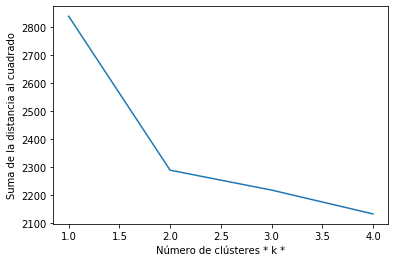

In [81]:
#Grafico
y = np.array([i for i in range(1,5,1)])
plt.xlabel('Número de clústeres * k *')
plt.ylabel('Suma de la distancia al cuadrado')
plt.plot(y,sse)

In [82]:
# Aplicar el algoritmo de K-Modes  con el valor de K=2
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 101, cost: 2289.0
Run 1, iteration: 2/100, moves: 24, cost: 2289.0


In [83]:
fitClusters_cao

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [84]:
# Combinando el arreglo analizado con el DF original
df=dfCopy.reset_index()

In [85]:
df.head()

,index,caseInCountry,reportingDate,location,gender,symptomOnset,hospVisitDate,exposureStart,exposureEnd,visitingWuhan,...,cough,vomiting_nausea_fatigue,difficultBreathing_respiratoryDistress,headache_heavyHead,throat,chill_cold,otherSymptom,asymptomatic,country,ageAgru
0,0,0,1/20/2020,Shenzhen Guangdong,1,1/3/20,1/11/20,12/29/2019,1/4/20,1,...,0,0,0,0,0,0,0,1,3,5
1,1,0,1/20/2020,Shanghai,2,1/15/2020,1/15/2020,NaN,1/12/20,0,...,0,0,0,0,0,0,0,1,3,4
2,2,0,1/21/2020,Zhejiang,1,1/4/20,1/17/2020,NaN,1/3/20,0,...,0,0,0,0,0,0,0,1,3,3
3,3,0,1/21/2020,Tianjin,2,NaN,1/19/2020,NaN,NaN,1,...,0,0,0,0,0,0,0,1,3,4
4,4,0,1/21/2020,Tianjin,1,NaN,1/14/2020,NaN,NaN,0,...,0,0,0,0,0,0,0,1,3,4


In [86]:
dfClusterizado = pd.DataFrame(fitClusters_cao)
dfClusterizado.columns = ['cluster_analizado']
dfNuevo = pd.concat([df, dfClusterizado], axis = 1).reset_index()
dfNuevo = dfNuevo.drop(['index', 'level_0'], axis = 1)

In [87]:
dfNuevo[300:310]

,caseInCountry,reportingDate,location,gender,symptomOnset,hospVisitDate,exposureStart,exposureEnd,visitingWuhan,fromWuhan,...,vomiting_nausea_fatigue,difficultBreathing_respiratoryDistress,headache_heavyHead,throat,chill_cold,otherSymptom,asymptomatic,country,ageAgru,cluster_analizado
300,99,2/22/2020,Hokkaido,1,2/3/20,2/3/20,NaN,NaN,0,0,...,0,1,0,0,0,0,0,9,7,1
301,100,2/22/2020,Hokkaido,1,2/16/2020,2/20/2020,NaN,NaN,0,0,...,0,0,0,0,0,1,0,9,6,1
302,101,2/22/2020,Hokkaido,2,2/17/2020,2/19/2020,NaN,NaN,0,0,...,0,0,0,0,0,0,1,9,4,0
303,102,2/22/2020,Hokkaido,1,2/10/20,2/10/20,NaN,NaN,0,0,...,0,0,0,0,0,0,0,9,5,1
304,103,2/22/2020,Hokkaido,2,2/15/2020,2/16/2020,NaN,NaN,0,0,...,1,0,1,0,0,1,0,9,4,0
305,104,2/22/2020,Hokkaido,2,2/6/20,2/7/20,NaN,NaN,0,0,...,0,0,0,1,0,1,0,9,0,1
306,105,2/22/2020,Hokkaido,2,2/13/2020,2/15/2020,NaN,NaN,0,0,...,0,0,0,1,0,0,0,9,4,1
307,106,2/22/2020,Tokyo,1,2/12/20,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,9,5,1
308,107,2/22/2020,Nagoya City,2,2/19/2020,2/21/2020,NaN,NaN,0,0,...,0,0,1,0,0,1,0,9,5,1
309,108,2/22/2020,Nagoya City,2,2/20/2020,2/21/2020,NaN,NaN,0,0,...,0,0,0,0,0,0,0,9,3,1


In [88]:
# Validacion del dataframe
#dfNuevo.shape ##Numero de registros y de columnas
#df.describe() ##De manera general podemos ver el numero de registros, media, varianza, etc., de las columnas
##df.info() ##Vemos los tipos de datos de las columnas
dfNuevo.to_csv('C:/Users/PC/Desktop/Prueba/Prueba.csv') ##Exportar DataFrame

In [89]:
#Identificación de clústeres
cluster_0 = dfNuevo[dfNuevo['cluster_analizado'] == 0]
cluster_1 = dfNuevo[dfNuevo['cluster_analizado'] == 1]

In [90]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 824
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   caseInCountry                           600 non-null    int64 
 1   reportingDate                           600 non-null    object
 2   location                                600 non-null    object
 3   gender                                  600 non-null    int64 
 4   symptomOnset                            332 non-null    object
 5   hospVisitDate                           308 non-null    object
 6   exposureStart                           81 non-null     object
 7   exposureEnd                             233 non-null    object
 8   visitingWuhan                           600 non-null    int64 
 9   fromWuhan                               600 non-null    int64 
 10  recovered                               600 non-null    int64 
 11  fever 

In [91]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 189 to 810
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   caseInCountry                           225 non-null    int64 
 1   reportingDate                           225 non-null    object
 2   location                                225 non-null    object
 3   gender                                  225 non-null    int64 
 4   symptomOnset                            214 non-null    object
 5   hospVisitDate                           185 non-null    object
 6   exposureStart                           23 non-null     object
 7   exposureEnd                             65 non-null     object
 8   visitingWuhan                           225 non-null    int64 
 9   fromWuhan                               225 non-null    int64 
 10  recovered                               225 non-null    int64 
 11  feve

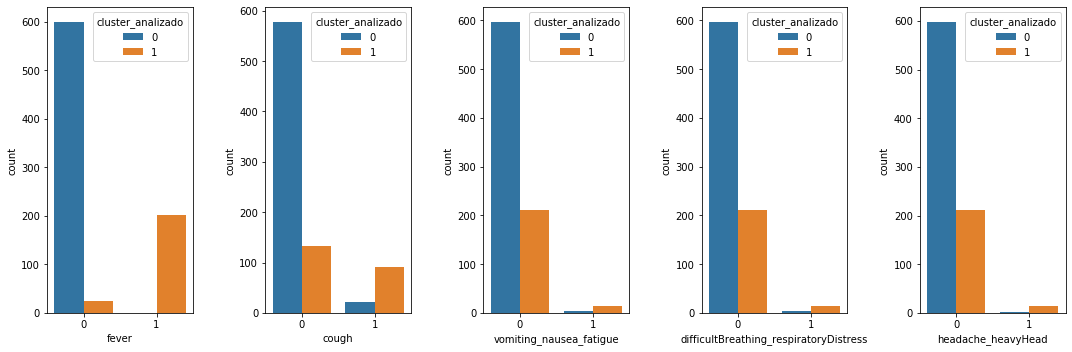

In [92]:
#Grafico Grupo de Sintomas 1
f, axs = plt.subplots(1,5,figsize = (15,5))
sns.countplot(x=dfNuevo['fever'],order=dfNuevo['fever'].value_counts().index,hue=dfNuevo['cluster_analizado'],ax=axs[0])
sns.countplot(x=dfNuevo['cough'],order=dfNuevo['cough'].value_counts().index,hue=dfNuevo['cluster_analizado'],ax=axs[1])
sns.countplot(x=dfNuevo['vomiting_nausea_fatigue'],order=dfNuevo['vomiting_nausea_fatigue'].value_counts().index,hue=dfNuevo['cluster_analizado'],ax=axs[2])
sns.countplot(x=dfNuevo['difficultBreathing_respiratoryDistress'],order=dfNuevo['difficultBreathing_respiratoryDistress'].value_counts().index,hue=dfNuevo['cluster_analizado'],ax=axs[3])
sns.countplot(x=dfNuevo['headache_heavyHead'],order=dfNuevo['headache_heavyHead'].value_counts().index,hue=dfNuevo['cluster_analizado'],ax=axs[4])

plt.tight_layout()
plt.show()

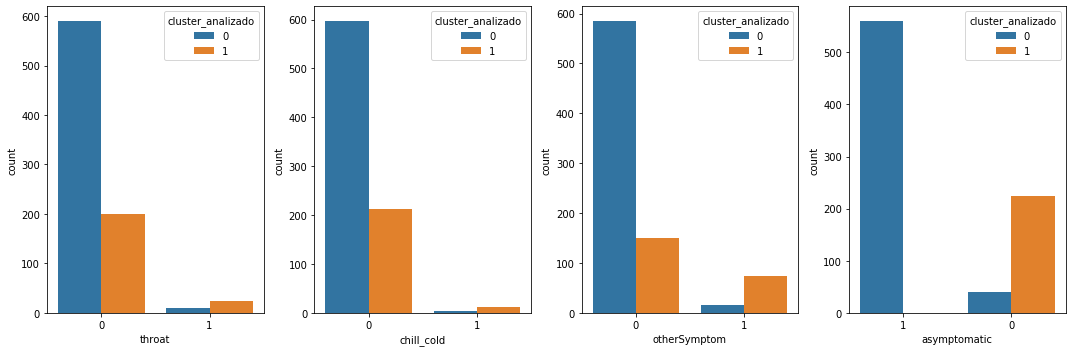

In [93]:
#Grafico Grupo de Sintomas 2
f, axs = plt.subplots(1,4,figsize = (15,5))
sns.countplot(x=dfNuevo['throat'],order=dfNuevo['throat'].value_counts().index,hue=dfNuevo['cluster_analizado'],ax=axs[0])
sns.countplot(x=dfNuevo['chill_cold'],order=dfNuevo['chill_cold'].value_counts().index,hue=dfNuevo['cluster_analizado'],ax=axs[1])
sns.countplot(x=dfNuevo['otherSymptom'],order=dfNuevo['otherSymptom'].value_counts().index,hue=dfNuevo['cluster_analizado'],ax=axs[2])
sns.countplot(x=dfNuevo['asymptomatic'],order=dfNuevo['asymptomatic'].value_counts().index,hue=dfNuevo['cluster_analizado'],ax=axs[3])

plt.tight_layout()
plt.show()

In [94]:
##Fin